# Iris dataset with SVC

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

In [9]:
sns.set_style("darkgrid")

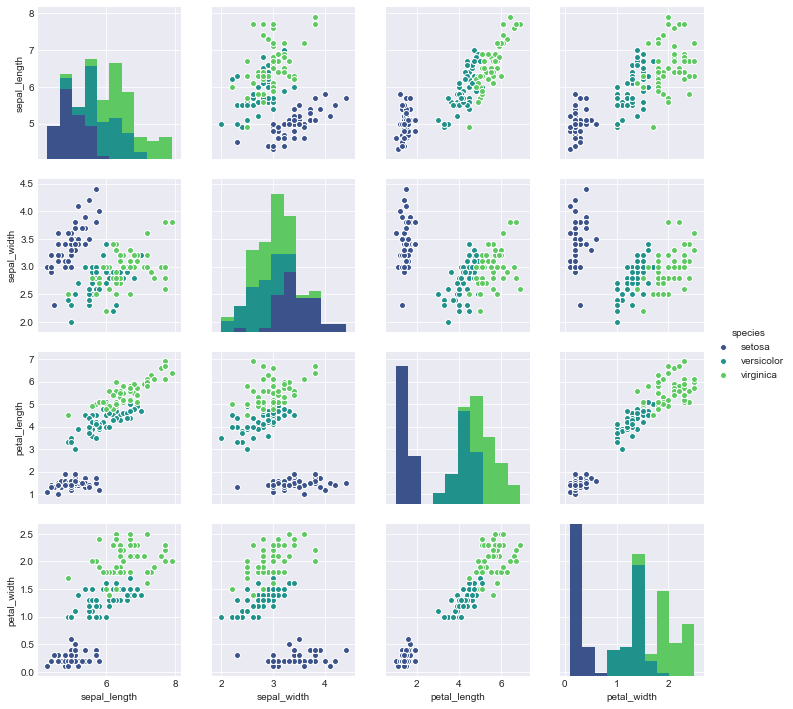

In [11]:
sns.pairplot(data=iris, hue="species", palette="viridis")

### The setosa look easily differenciable than the two others species

**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

In [49]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [64]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

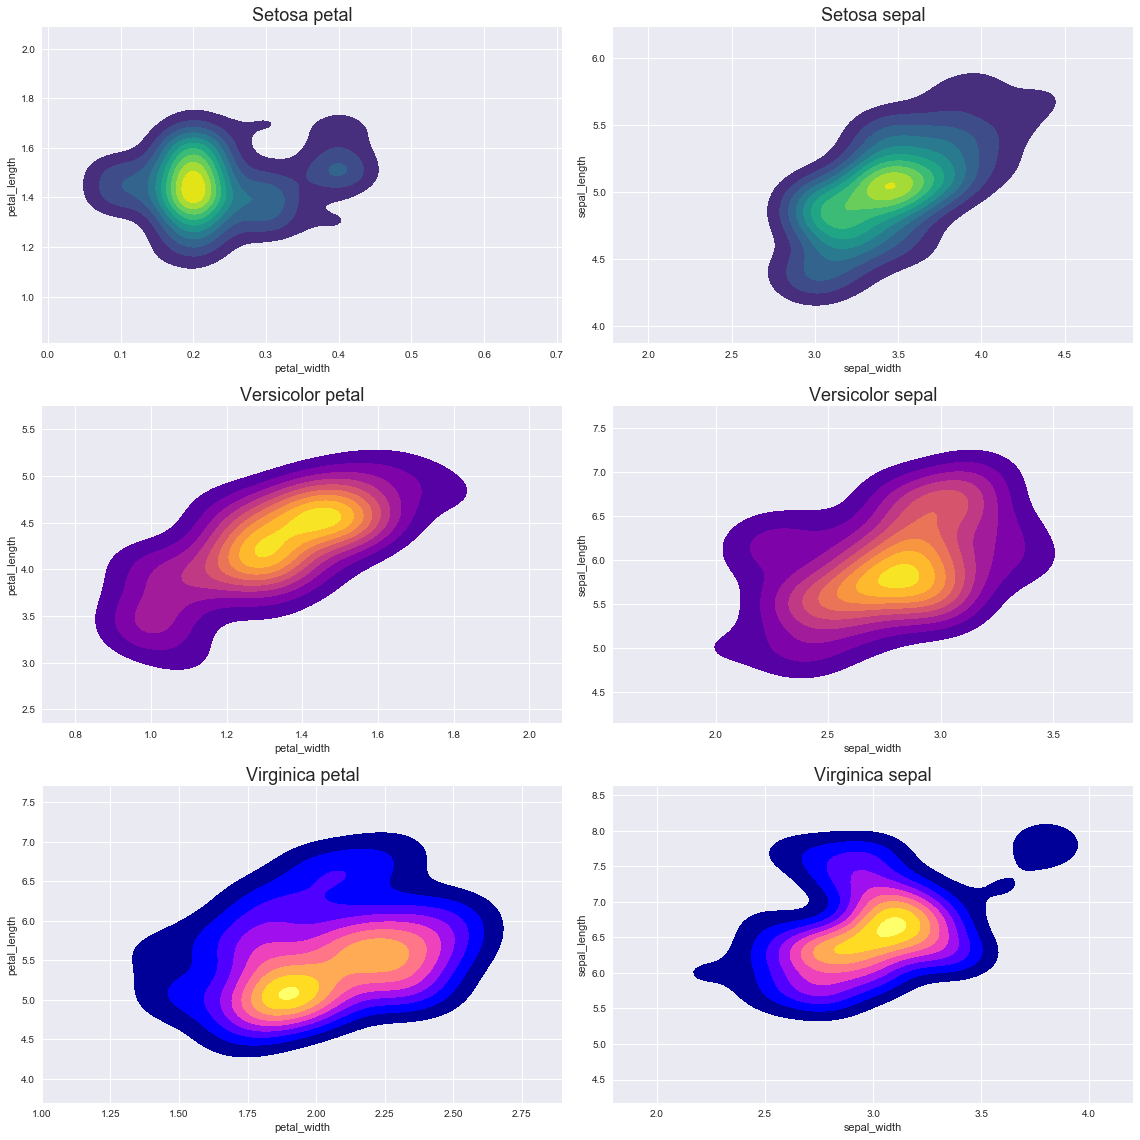

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(16,16))

sns.set_style("darkgrid")

setosa = iris[iris["species"] == "setosa"]
versicolor = iris[iris["species"] == "versicolor"]
virginica = iris[iris["species"] == "virginica"]

# Petal
sns.kdeplot(setosa["petal_width"], setosa["petal_length"], shade=True, cmap="viridis", 
            shade_lowest=False, ax=ax1[0])
sns.kdeplot(versicolor["petal_width"], versicolor["petal_length"], shade=True, cmap="plasma",
                  shade_lowest=False, ax=ax2[0])
sns.kdeplot(virginica["petal_width"], virginica["petal_length"], shade=True, cmap="gnuplot2",
                  shade_lowest=False, ax=ax3[0])

# Sepal
sns.kdeplot(setosa["sepal_width"], setosa["sepal_length"], shade=True, cmap="viridis", 
            shade_lowest=False, ax=ax1[1])
sns.kdeplot(versicolor["sepal_width"], versicolor["sepal_length"], shade=True, cmap="plasma",
                  shade_lowest=False, ax=ax2[1])
sns.kdeplot(virginica["sepal_width"], virginica["sepal_length"], shade=True, cmap="gnuplot2",
                  shade_lowest=False, ax=ax3[1])



ax1[0].set_title("Setosa petal", fontsize=18)
ax2[0].set_title("Versicolor petal", fontsize=18)
ax3[0].set_title("Virginica petal", fontsize=18)

ax1[1].set_title("Setosa sepal", fontsize=18)
ax2[1].set_title("Versicolor sepal", fontsize=18)
ax3[1].set_title("Virginica sepal", fontsize=18)

plt.tight_layout()

# Split Test

In [317]:
from sklearn.model_selection import train_test_split

In [318]:
X = iris.drop("species", axis=1)
y = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Train The Model

In [319]:
from sklearn.svm import SVC

In [320]:
svc = SVC()

svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [210]:
predictions = svc.predict(X_test)

In [211]:
from sklearn.metrics import classification_report, confusion_matrix

In [212]:
print("classification_report")
print(classification_report(y_test, predictions))
print("\n")
print("confusion matrix")
print(confusion_matrix(y_test, predictions))

classification_report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.90      1.00      0.95        18
  virginica       1.00      0.86      0.92        14

avg / total       0.96      0.96      0.96        45



confusion matrix
[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]


## Gridsearch Time

In [213]:
from sklearn.model_selection import GridSearchCV

In [321]:
param_grid = {"C": np.arange(0.5, 3, 0.5), "gamma": np.arange(0, 5)}

In [322]:
grid = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=-1)

In [323]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.5, gamma=0 ..................................................
[CV] C=0.5, gamma=0 ..................................................
[CV] C=0.5, gamma=0 ..................................................
[CV] ......... C=0.5, gamma=0, score=0.3333333333333333, total=   0.0s
[CV] C=0.5, gamma=1 ..................................................
[CV] C=0.5, gamma=4 ..................................................
[CV] ........ C=0.5, gamma=0, score=0.34285714285714286, total=   0.0s
[CV] C=0.5, gamma=1 ..................................................
[CV] ........ C=0.5, gamma=0, score=0.35294117647058826, total=   0.0s
[CV] C=0.5, gamma=1 ..................................................
[CV] ......... C=0.5, gamma=1, score=0.9722222222222222, total=   0.0s
[CV] C=0.5, gamma=2 ..................................................
[CV] C=0.5, gamma=2 ..................................................
[CV] ......... C

[CV] ......... C=1.0, gamma=3, score=0.9705882352941176, total=   0.0s
[CV] C=1.5, gamma=2 ..................................................
[CV] C=1.0, gamma=4 ..................................................
[CV] ......... C=2.5, gamma=2, score=0.9714285714285714, total=   0.0s
[CV] ........................ C=2.0, gamma=3, score=1.0, total=   0.0s
[CV] C=2.5, gamma=2 ..................................................
[CV] C=2.0, gamma=3 ..................................................
[CV] ......... C=1.0, gamma=4, score=0.9722222222222222, total=   0.0s
[CV] ......... C=1.5, gamma=2, score=0.9705882352941176, total=   0.0s
[CV] C=1.5, gamma=3 ..................................................
[CV] C=1.0, gamma=4 ..................................................
[CV] ......... C=2.0, gamma=3, score=0.9428571428571428, total=   0.0s
[CV] ......... C=2.5, gamma=2, score=0.9705882352941176, total=   0.0s
[CV] C=2.5, gamma=3 ..................................................
[CV] C

[Parallel(n_jobs=-1)]: Done   8 out of  75 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5]), 'gamma': array([0, 1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [324]:
grid.best_params_

{'C': 0.5, 'gamma': 2}

In [325]:
grid.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [326]:
grid_predictions = grid.predict(X_test)

In [327]:
print("classification_report")
print(classification_report(y_test, grid_predictions))
print("\n")
print("confusion matrix")
print(confusion_matrix(y_test, grid_predictions))

classification_report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.95      1.00      0.97        18
  virginica       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45



confusion matrix
[[13  0  0]
 [ 0 18  0]
 [ 0  1 13]]
